# Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook! Only the notebook file will be submitted, do not change the data filenames, file content or paths we'll use the provided ones.

Student name: Alice Pagano <br>
ID Number: 1236916

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the full dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains the height, weight and age.

From Wikipedia:

The **Center** (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

**Point Guards** (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 


As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we will exploit this features to estimate the role.


### Three features (regressors) are considered for this dataset:


1) Height in cm

2) Weight in kg

3) Age in years

We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
We will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed (you can use your ID (matricola) or any other number!).

In [2]:
IDnumber = 1236916 # try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
#load the dataset
filename = 'data/NBA.csv' # do not change the file name or content
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) #skip first line
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:4] #columns 1,2,3 contain the features
Y = dataset[:,0]  # column 0: labels


Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m) # random permurtation

X = X[permutation]
Y = Y[permutation]

#print(X)

['Position', 'Height cm', 'kg', 'Age']


We are going to classify class "1" (Center) vs class "-1" (Point Guard)

B) **TO DO** Divide the data into training set and test set (3/4 of the data in the first set, 1/4 in the second one)

In [4]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

#m_training needs to be the number of samples in the training set
m_training = int(3/4*X.shape[0])

#m_test needs to be the number of samples in the test set
m_test = int(1/4*X.shape[0])

#X_training = instances for training set
X_training = X[:m_training,:]
#Y_training = labels for the training set
Y_training = Y[:m_training]

#X_test = instances for test set
X_test =  X[m_training:m_test+m_training,:]
#Y_test = labels for the test set
Y_test = Y[m_training:m_test+m_training]

print(Y_training) #to make sure that Y_training contains both 1 and -1
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[ 1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1  1  1  1 -1 -1
  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1
 -1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1
 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1
  1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1
  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1
  1  1 -1]
65
Shape of training set: (195, 3)
Shape of test set: (65, 3)


**TO DO** Now add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. You can use the function $hstack$ in $numpy$

In [5]:
#add a 1 to each sample (homogeneous coordinates)

one = np.ones((X_training.shape[0],1))

X_training_1 = np.hstack((one,X_training))

#print(X_training_1)
#print(Y_training)

one = np.ones((X_test.shape[0],1))
X_test_1 = np.hstack((one,X_test))

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

In [6]:
def perceptron(X, Y, max_num_iterations):
    
    w = np.zeros(X.shape[1])
    
    all_err = []
    all_w = []
    t=1
    
    
    while (t<= max_num_iterations):
        
        for i in range(X.shape[0]):
            
            if ( Y[i]*np.dot(w,X[i]) ) <= 0:
                w = w + Y[i]*X[i]
                err = 0
                
                for j in range(X.shape[0]):
                    if ( Y[j]*np.dot(w,X[j]) ) <= 0:
                        err += 1    
                        
                all_err.append(err/X.shape[0])
                all_w.append(w)       
                t+=1
                break
                
            if (i==X.shape[0]-1):  
                best_w = all_w[-1]   
                best_error = all_err[-1]
                return best_w,best_error   
            else:
                continue  
    
    index = np.argmin(all_err)
    best_w = all_w[index]
    best_error = all_err[index]
    
    print('number of iteration:',t)
    return best_w, best_error


Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training_1,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))

number of iteration: 101
Training Error of perpceptron (100 iterations): 0.07179487179487179


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset

num_errors = 0

for i in range(X_test_1.shape[0]):   
            if ( Y_test[i]*np.dot(w_found,X_test_1[i]) ) <= 0:
                num_errors += 1
                
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

diff_error = true_loss_estimate - error
print("Difference:"+ str(diff_error))

Test Error of perpceptron (100 iterations): 0.09230769230769231
Difference:0.020512820512820523


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWE QUESTION 1** <br>
The difference is $\sim0.0205$ and it is due to the fact that the training error deriving from the algorithm is influenced by the data itself, while the error in the test_set is greater than the former because there is not this effect, indeed the test data is unknown. 

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 5000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 5000 iterations here!

w_found, error = perceptron(X_training_1,Y_training, 5000)
print("Training Error of perpceptron (5000 iterations): " + str(error))

num_errors = 0

for i in range(X_test_1.shape[0]):   
            if ( Y_test[i]*np.dot(w_found,X_test_1[i]) ) <= 0:
                num_errors += 1
                
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (5000 iterations): " + str(true_loss_estimate))

diff_error = true_loss_estimate - error
print("Difference:"+ str(diff_error))

number of iteration: 5001
Training Error of perpceptron (5000 iterations): 0.07179487179487179
Test Error of perpceptron (5000 iterations): 0.09230769230769231
Difference:0.020512820512820523


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**
The difference it is the same maybe because the best_w and it is relative best_err have been already founded in the first 100 iterations.

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  # set labels to {-1, 1} as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = int(3/4*X.shape[0])
m_test = int(1/4*X.shape[0])

X_training =  X[:m_training,:]
Y_training = Y[:m_training]

X_test = X[m_training:m_test+m_training,:]
Y_test = Y[m_training:m_test+m_training]

print(Y_training) #to make sure that Y_training contains both 1 and -1
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

one = np.ones((X_training.shape[0],1))

X_training_1 = np.hstack((one,X_training))

#print(X_training_1)
#print(Y_training)

one = np.ones((X_test.shape[0],1))
X_test_1 = np.hstack((one,X_test))

[-1 -1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1
  1 -1  1  1  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1
  1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1
  1 -1  1  1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1
 -1 -1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1
  1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1]
65
Shape of training set: (195, 3)
Shape of test set: (65, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [12]:
#part on logistic regression for 2 classes

logreg = linear_model.LogisticRegression(C=1e5)

#learn from training set

reg = logreg.fit(X_training_1,Y_training)

print(reg)
#predict on training set

pred = logreg.predict(X_training_1)

#print the error rate = fraction of missclassified samples
error_rate_training = 0

for i in range(pred.shape[0]):   
            if pred[i] != Y_training[i]:
                error_rate_training += 1
                
error_rate_training = error_rate_training/m_training

print("Error rate on training set: "+str(error_rate_training))

#predict on test set

pred = logreg.predict(X_test_1)

#print the error rate = fraction of missclassified samples
error_rate_test = 0 

for i in range(pred.shape[0]):   
            if pred[i] != Y_test[i]:
                error_rate_test += 1
                
error_rate_test = error_rate_test/m_test

print("Error rate on test set: " + str(error_rate_test))

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Error rate on training set: 0.06153846153846154
Error rate on test set: 0.07692307692307693


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:
#to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

index_feature1 = 0
index_feature2 = 1
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

#print(X_reduced)
m_training = int(3/4*X_reduced.shape[0])
m_test = int(1/4*X_reduced.shape[0])


X_training = X_reduced[:m_training,:]
Y_training = Y[:m_training]

X_test = X_reduced[m_training:m_test+m_training,:]
Y_test = Y[m_training:m_test+m_training]

one = np.ones((X_training.shape[0],1))

X_training_1 = np.hstack((one,X_training))

#print(X_training_1)
#print(Y_training)

one = np.ones((X_test.shape[0],1))
X_test_1 = np.hstack((one,X_test))

Now learn a model using the training data and measure the performances.

In [14]:
# learning from training data

#part on logistic regression for 2 classes

logreg = linear_model.LogisticRegression(C=1e5)

#learn from training set

reg = logreg.fit(X_training,Y_training)

print(reg)
#predict on training set

pred = logreg.predict(X_training)

#print the error rate = fraction of missclassified samples
error_rate_training = 0

for i in range(pred.shape[0]):   
            if pred[i] != Y_training[i]:
                error_rate_training += 1
                
error_rate_training = error_rate_training/m_training

print("Error rate on training set: "+str(error_rate_training))

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Error rate on training set: 0.06666666666666667


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
print(X_reduced)

[[195  94]
 [185  81]
 [222 125]
 [185 108]
 [186 103]
 [216 146]
 [219 117]
 [182  78]
 [219 117]
 [213 103]
 [185 126]
 [231 139]
 [225 112]
 [186 119]
 [155  81]
 [216 112]
 [210 114]
 [213 119]
 [213 114]
 [186 119]
 [185 108]
 [186 119]
 [182  74]
 [186 119]
 [213 114]
 [155  87]
 [185 108]
 [213 128]
 [186 119]
 [213 128]
 [186 119]
 [219 117]
 [185  76]
 [219 101]
 [219 117]
 [186 103]
 [185  81]
 [182  78]
 [210 126]
 [182  78]
 [213 128]
 [216 112]
 [186 119]
 [213 114]
 [195  94]
 [182  78]
 [210 114]
 [185  81]
 [216 146]
 [182  78]
 [198  85]
 [198  85]
 [195  94]
 [185  81]
 [216 112]
 [213 120]
 [216 146]
 [213 117]
 [213 108]
 [185 126]
 [186 119]
 [182  75]
 [185  76]
 [186 116]
 [213 114]
 [213 117]
 [186 119]
 [213 120]
 [185  96]
 [185  88]
 [192  76]
 [186 119]
 [213 110]
 [222 117]
 [188  83]
 [195  94]
 [216 146]
 [195  94]
 [186 108]
 [186 119]
 [231 139]
 [216 146]
 [213 108]
 [195  94]
 [213 114]
 [216 112]
 [216 112]
 [213 114]
 [182  78]
 [213 108]
 [192  76]

**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

I selected the height and the weight, because they are more relevant for the role a player can have than the age. The performance in the case with all the 3 features and the one with only height and weight are equivalent. 
It means that the height and the weight are well correlated with the role of a player.

I've also selected the height and the age, but the error measured is very high meaning that they are not well correlated with the role. 

Finally, the weight and the age have a training error similar to the case with height and weight.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

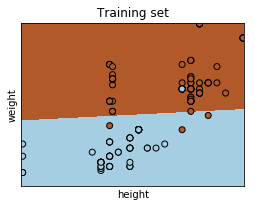

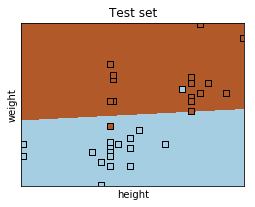

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation


h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()